# Week 4 - Time Series Analysis and Pairs Trading
In this week we'll take a dive into time series and understand important concepts like stationarity, cointegration, and rolling linear regression.

- This flavor of quantitiative finance is often refered to as statistical arbitrage since we'll use statistical tools to identify and test hypothesis we're making about stocks. 
- This is what most quantitative finance firms do today outside of high frequency trading.  
    - Without insane infrastructure investments, you'll never get to arbitrage opportunities before a high frequency trader.
    - Your best bet is to find some tradable inefficiency in the market using statistical tools and hope that not too many other people are doing the exact same thing as you.


# Mean and Standard Deviation Tutorial

### What is a Mean?
Mean is another word for *average*.
-    The formula for the mean is the sum of a certain value of a dataset divided by the number of datapoints. 
        - Of course you are probably already familiar with this formula.
-    Like many other statistical quantities, the mean is very important when studying quantitative analysis.

### What is a Standard Deviation?
Standard deviation refers to the spread of a certain value of a dataset or more simply, it describes the average distance of a set of values from its mean.
-   The formula for standard deviation is the square root of the difference between the square of each value and the mean divided by the total number of datapoints.
       -   You are probably also familiar with this formula.
-   The standard deviation is used extensively in statistics and quantitative analysis to estimate potential values and their likelihoods.
-   **Note :** Notice that standard deviation is directly dependent on the mean. This means that analyzing distributions and the spread of values in a dataset requires you to calculate a mean.

### Why are we reviewing these basic statistics!?
Though the mean and standard deviation are simple values that are useful when trying to have a basic understanding of a dataset, they are both important in the world of **stochastics**.
-   Stochastics is a field that studies probabilities that are randomly determined but can be estimated via statistical analysis or pattern recognition.
      -  Because pattern recognition and statistical analysis includes analyzing distribution and its probabilities, both the mean and standard deviation are important values.

### Def: stationary time series
A time series (technically a stochastic process) is stationary if the probability distribution does not change when shifted in time.  In essense, this means that the mean and standard deviation of the time series is constant.  

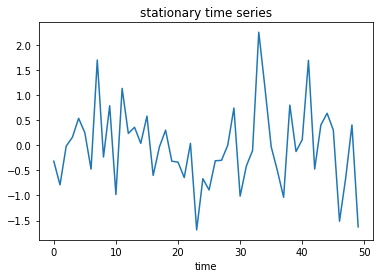

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# let's generate a random vector that can model a stock time series
X = np.random.normal(0, 1, size=(50, 1))  # draw 50 values from a normal distribution N(0, 1)
plt.plot(X)
plt.xlabel("time")
plt.title("stationary time series")
plt.show()

What we notice about this time series is that although it's entirely random, we still can say that the mean is constant at about 0.  This is significant because oftentimes we don't have constant mean time series in assets since they tend to appreciate over time.  Thus, we have good reason to believe that this time series is stationary.

### Def: non-stationary time series
A time series is non-stationary if the probability distribution changes throughout time.  This basically means that it has a non-constant mean or standard deviation.

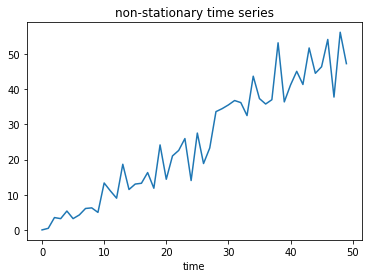

In [4]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]  # draw from random normal N(mu, sigma)
plt.plot(Y)
plt.xlabel("time")
plt.title("non-stationary time series")
plt.show()

This is something closer to what we would expect for an asset since the price increases over time.  It doesn't really make sense to talk about the mean of a time series like this since at any given point in our time, the mean will be different for a different time.

The obvious question, therefore, is how can we make this non-constant mean time series look like the first one.  

Don't worry, this next definition has nothing to do with the integration that you know from calculus (well technically it does in a very interesting way, but the formalism is not the point here).

### Def: order of integration
We define the order of integration $I(d)$ of a time series $T_i$ as the number of first differences required to make the time series stationary.  We call an $I(d)$ series integrative of order $d$.  
- By first difference we mean subtracting the time series by itself shifted over by 1, namely $T_i - T_{i-1}$

From this we see that a stationary time series is I(0), which we call integrative of order 0.

Let's look at the first difference for our non-stationary time series.

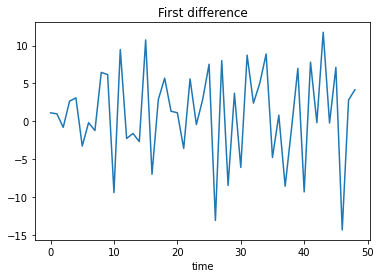

In [5]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
first_diff = np.diff(Y)
plt.plot(first_diff)
plt.xlabel("time")
plt.title("First difference")
plt.show()

We see that this time series looks very similar to the first time series that we plotted since the mean and standard deviation look constant throughout the entire time series.  This gives us a good reason to believe that the time series is stationary.

# Hypothesis Testing Basics
In statistics, we can test our beliefs about an observed distribution using a **hypothesis test**.  There are two central parts to a hypothesis test, the null hypothesis and the alternative hypothesis.  

For these examples let's suppose we want to test if some observed distribution is normally distributed.  

- Null hypothesis ($H_0$): our data is normally distributed.
- Alternative hypothesis ($H_1$): our data is not normally distributed.  

When we carry out this test we'll get a p-value, which represents the probability of obtaining results at least as extreme as the data we observe under the assumption that our null hypothesis is correct.  
- In our example, this is the probability that data more extreme than our observed distribution is normal.  
    - If our data visually appears normal, then this p value would be high.
    - Whereas if our data didn't look very normal, then this p value would be pretty low.  
    
### Interpreting the p value
- Whenever we do a hypothesis test we pick a value called the significance level.  It's usually something like .05 or .01.  
- If our p value is less than the significance level, then we reject the null hypothesis in favor of the alternative hypothesis
- Whereas if our p value is higher than the significance level, then we fail to reject the null hypothesis.  
    - Wording in these cases is very important.  By rejecting the null hypothesis it would be incorrect to say that the alternative hypothesis is true, it's just that the null hypothesis is likely not true.  
- The smallness or largeness of the p value also doesn't matter.  **P values are binary**: it's either above or below the significance level.  At the 5% signicance level, it doesn't matter whether our p value is one hundreth or one billionth.  Very small or very big p values don't make the null hypothesis any more true or false.  


### Augmented Dicky-Fuller Test
**$H_0$** the time series has a unit root (aka not stationary).

**$H_1$** the time series has no unit root (aka stationary).

We phrase it in this way since the null hypothesis is usually stated in terms of a distribtion having some attribute rather than not having it. 

In [6]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dicky-Fuller

def is_stationary(data, level=.01):
    # return true if likely stationary
    p_value = adfuller(data)[1]
    print("p value: ", p_value)
    if p_value < level:
        return True
    return False

X = np.random.normal(0, 1, size=(50, 1))
is_stationary(X)

p value:  8.171219499537645e-05


True

At the significance level of .01, we reject the null hypothesis that this time series is not stationary.

Now let's try this out on our non-stationary time series.

In [7]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
is_stationary(Y)

p value:  0.9746263709801585


False

Our p value is above the significance level, so we do not reject the null hypothesis that the time series is not stationary.

Let's see what happens after we apply the first difference.

In [8]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
first_diff = np.diff(Y)
is_stationary(first_diff)
# reject null hypothesis

p value:  4.0177195384838123e-10


True

### Pairs Trading - theory

Now let's talk about multiple time series.  The idea is that we have two time series that are correlated, and we want to trade them as a pair instead of as two individual assets.  Such a pair has a price derived from the underlying asset, and we refer to this constructed asset as a derivative.

# Financial Derivatives

### What is a Financial Derivative?
A Financial Derivative is a financial instrument that is derived from some other security.
-    In almost every case, owning a financial derivative gives you the right to purchase the underlying security at a certain price before a certain date.
        -  The most common forms of financial derivatives includes... :
            -   Options Contracts (Calls, Puts, etc.).
            -   Index Futures (US 30 (DOW), US 100 (SPY), US Tech 100 (NQ), etc.).
            -   Commodity Futures (Gold Futures, Soybean Futures, Crude Oil Futures, etc.).
            -   Swaps (Credit Swaps, Interest Rate Swaps, etc.).
            -   and many more...
        -   For the purposes of this course, we will focus on options and index futures.
-   The vast majority of financial derivatives are managed and issued by Cboe Global Markets.
-   Excluding options, the vast majority of financial dervatives are traded by institutions as a means to hedge equity positions or to profit via speculative trading.
-   Derivatives often carry more risk than traditional equities because they are *leveraged*.
       -    Leverage refers to the ability to control more securities than one paid for.
       -   **Note :** Many blame the lack of regulation in the derivatives market as the cause of the *2008 Financial Crisis* and following *Great Recession*. Derivatives should be used with extreme caution.

### What are Options Contract?
Commonly shortened to "options," options contracts give the holder the "option" to exercise the contract at anytime before the expiration date if the underlying security's price is above the "strike price."
-   There are two main types of options :
       -   **Calls :** gives the holder the option to buy 100 shares of a certain security from the issuer at a certain strike price.
       -   **Puts :** gives the holder the option to sell 100 shares of a certain security from the issuer at a certain strike price.
-   Both types of options are leveraged, because the holder has the rights to 100 shares of a security that they did not pay for. 
       -   Because of this, options are more volatile than the underlying security.
-   Options expire worthless if they aren't exercised before the expiration date.
       -   For this reason, options decrease in value exponentially as we get closer to expiration. This is also known as **theta decay**.
-   Options trading is a form of speculation--the buyer of an option is betting that the underlying security will either go up in value (for a call) or go down in value (for a put) by the expiration date.
       -   As the underlying security changes in value, the associated option will also change in value (often more dramatically).
       -   The *implied volatility*, or simply IV, is a value that measures the implied (anticipated) movement of the underlying security. As IV goes up, the option's price will also go up. Algos that trade based off of news sentiment takes advantage of IV for profit.
-   **Note :** These definitions *only* apply to US options managed by the Chicago Board Option Exchange. 
       -   Employers may issue employer compensation in the form of non-derivative options which are not leveraged.
       -   Options contracts work vastly differently in other parts of the world.

### What are Index Futures?
Index futures are also a type of contract that allows the holder to purchase a certain security for a certain price that will settle on a later date. In the case of index futures, the right to purchase Dow Jones Industrial Average (DJIA), S&P 500, Nasdaq 100, and many other indexes.
-   There are two types of positions you can take on any future :
       -   **Long :** the purchaser believes that the future will appreciate (go up) in value.
       -   **Short :** the purchaser believes that the future will depreciate (go down) in value.
-   Like options contracts, they are used as a means to hedge a position or to speculate on future price movements.
-   Unlike options contracts or commodity futures, index futures are *cash settled*. This means that the index future contract holder doesn't actually purchase the underlying security, but instead recieves an appropriate cash payment.
-   Index futures are complex financial instruments that mostly only institutions are involved in.
       - Examples of entitites involved in trading index futures include : investment banks, hedge funds, portfolio managers, HFT traders, etc.

### Final Remarks
Financial derivatives are complex financial instruments that are important for institutions and quantitative analysts.
-   Derivatives provide a method to speculate on the future of a security without actually owning the security.
-   Derivatives are associated with more risk because of *leverage*.



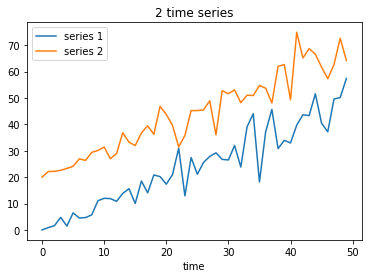

In [32]:
series1 = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
series2 = [np.random.normal(x + 20, np.sqrt(x)) for x in range(50)]
plt.plot(series1, label="series 1")
plt.plot(series2, label="series 2")
plt.xlabel("time")
plt.title("2 time series")
plt.legend()
plt.show()

We see these two time series seem to exhibit a lot of the same behavior.  Although they don't move identically, they have a strong correlation.  If these were real assets we could use this knowledge to our advantage to make a hedged bet about the pair's movement depending on if they converge/diverge.

### Def: Cointegration
Two time series $T_i$ and $S_i$ are cointegrated if $T_i$ and $S_i$ are both $I(1)$ and there a real exists $\alpha$ such that $\epsilon_i = T_i - \alpha S_i$ is $I(0)$.

To unpack this a bit, we want a linear combination of two time series to be stationary (since $\epsilon_i$ should just be random noise).

To find $\alpha$, we can do ordinary least squares regression.


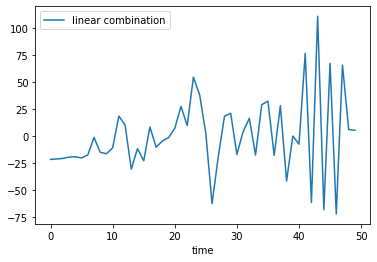

p value:  0.0007876508089044067


True

In [9]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
series1 = [np.random.normal(x, x) for x in range(50)]
series2 = [np.random.normal(x + 20, x) for x in range(50)]


series1 = add_constant(series1)
model = OLS(series2, series1)
results = model.fit()
y_intercept, slope = results.params
series1 = np.array([x[1] for x in series1])
series2 = np.array(series2)

comb_series = series2 - series1 * slope - y_intercept
plt.plot(comb_series, label="linear combination")
plt.xlabel("time")
plt.legend()
plt.show()

is_stationary(comb_series)

This gives us series2 = series1 * slope - y-intercept

Thus we see that this linear combination time series is stationary, exactly as we wanted.  This won't always be the case since these values are generated randomly.  Results will be much nicer once we operate on real financial data in the next section.

There's also a very significant bias that we have to address in this example called look ahead bias.